<a href="https://colab.research.google.com/github/mynameis-sohee/Customer-Gender-Prediction/blob/main/03_%5B%EB%AA%A8%EB%8D%B8%EB%A7%81%26%EC%A0%84%EC%B2%98%EB%A6%AC(2)%5D_Modeling_%26_Data_Preprocessing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 모델링을 시작합니다.
### Feature Engineering 등의 **3차 전처리**는 모델링과 함께 진행하며, 모델 성능을 높일 예정입니다.

#### 모델선택
결과: f1-score, 정확도, AUC 가 가장 높은 그래디언트 부스팅 모델을 선택합니다.

In [ ]:
# 특성중요도 확인 시 필요한 eli5 라이브러리를 설치합니다.
pip install eli5

     |████████████████████████████████| 112kB 11.3MB/s 


In [ ]:
# 추가적으로 필요한 라이브러리를 import 합니다.
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

### Modeling
#### 랜덤포레스트, XB부스팅, 그래디언트 부스팅 모델을 활용해 모델링을 진행해봅니다.

**결과: 대체적으로 f1-score, 정확도, AUC 가 가장 높은 그래디언트 부스팅 모델을 선택합니다.**

In [ ]:
# 랜덤포레스트 활용

pipe_rf = make_pipeline(
    RandomForestClassifier(n_estimators=300))

dists = {'randomforestclassifier__max_depth': range(3,10), 'randomforestclassifier__min_samples_leaf': range(2,20), 'randomforestclassifier__min_samples_split':range(2,10)}

clf_rf = GridSearchCV(pipe_rf, param_grid=dists, cv=5, scoring='roc_auc')

clf_rf.fit(X_train, y_train)
pipe_rf = clf_rf.best_estimator_

pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_val)

print(accuracy_score(y_val, pred_rf))
print(f1_score(y_val,pred_rf))
print(roc_auc_score(y_val, pred_rf))

0.53125
0.5508982035928144
0.5330748536160784


In [ ]:
# XGB 활용

pipe_xg = make_pipeline(
    XGBClassifier(n_estimators=300))

dists = {'xgbclassifier__learning_rate': [0.01,0.05,0.1,0.3,0.5,1], 'xgbclassifier__min_child_weight': range(1,10), 'xgbclassifier__max_depth':range(3,10), 'xgbclassifier__colsample_bytree':[0.5,0.7,1.0]}

clf_xgb = GridSearchCV(pipe_xg, param_grid=dists, cv=5, scoring='roc_auc')

clf_xgb.fit(X_train, y_train)
pipe_xgb = clf_xgb.best_estimator_

pipe_xgb.fit(X_train, y_train)
pred_xgb = pipe_xgb.predict(X_val)

print(accuracy_score(y_val, pred_xgb))
print(f1_score(y_val,pred_xgb))
print(roc_auc_score(y_val, pred_xgb))

0.5125
0.5185185185185185
0.5176451970248458


In [ ]:
# 그래디언트부스팅 활용
# 대체적으로 f1-score, 정확도, AUC 가 가장 높은 그래디언트 부스팅 모델을 선택합니다.

pipe_gb = make_pipeline(
    GradientBoostingClassifier())

dists = {'gradientboostingclassifier__learning_rate' : [0.01,0.05,1] ,'gradientboostingclassifier__loss' : ['deviance','exponential'],'gradientboostingclassifier__min_samples_leaf' : range(3,7), 'gradientboostingclassifier__max_depth' : range(3,10)}

clf_gb = GridSearchCV(pipe_gb, param_grid=dists, cv=5, scoring='roc_auc')

clf_gb.fit(X_train, y_train)
pipe_gb = clf_gb.best_estimator_

pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_val)

print(accuracy_score(y_val, pred_gb))
print(f1_score(y_val,pred_gb))
print(roc_auc_score(y_val, pred_gb))

0.5625
0.5512820512820513
0.572558949200823


In [ ]:
# 그래디언트 부스팅 모델의 recall값, f1-score값 등 성능평가지표값을 확인합니다.

print(classification_report(pred_gb, y_val))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57        93
           1       0.48      0.64      0.55        67

    accuracy                           0.56       160
   macro avg       0.57      0.57      0.56       160
weighted avg       0.59      0.56      0.56       160



### Feature Importances를 통한 Feature Engineering

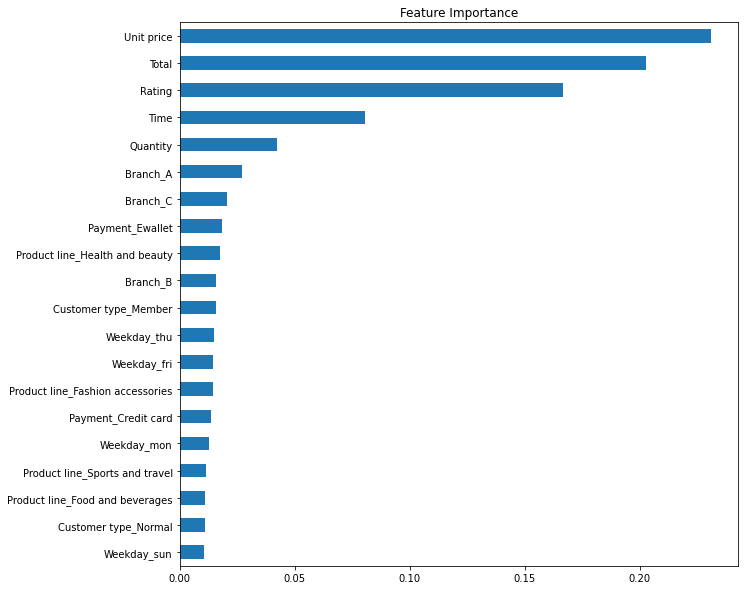

In [ ]:
# 특성 중요도를 살펴보겠습니다.

gb = pipe_gb.named_steps['gradientboostingclassifier']
importances = pd.Series(gb.feature_importances_, X_train.columns)

plt.figure(figsize=(10,10))
plt.title(f'Feature Importance')
importances.sort_values()[-20:].plot.barh();

In [ ]:
# eli5 라이브러리 기반 Feature Importance 를 산출합니다.
# https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

permuter = PermutationImportance(
    pipe_gb.named_steps['gradientboostingclassifier'],
    scoring='accuracy',
    n_iter=5)

permuter.fit(X_val, y_val)

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Customer type_Normal                  -0.00750
Weekday_thu                            0.00125
Product line_Food and beverages        0.00250
Product line_Sports and travel         0.00250
Payment_Cash                           0.00375
Product line_Electronic accessories    0.00500
Product line_Home and lifestyle        0.00750
Branch_C                               0.00875
Weekday_sat                            0.01000
Branch_B                               0.01000
Total                                  0.01125
Customer type_Member                   0.01250
Branch_A                               0.01375
Weekday_sun                            0.01500
Weekday_wed                            0.01500
Weekday_tue                            0.01625
Time                                   0.01625
Weekday_fri                            0.02000
Weekday_mon                            0.02000
Product line_Fashion accessories       0.02125
Quantity                               0.02375
Payment_Credi

In [ ]:
# 위의 자료를 시각화합니다.

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names)

Weight,Feature
0.0463 ± 0.0341,Product line_Health and beauty
0.0438 ± 0.0440,Unit price
0.0437 ± 0.0137,Rating
0.0312 ± 0.0262,Payment_Ewallet
0.0250 ± 0.0112,Payment_Credit card
0.0238 ± 0.0166,Quantity
0.0212 ± 0.0218,Product line_Fashion accessories
0.0200 ± 0.0166,Weekday_mon
0.0200 ± 0.0200,Weekday_fri
0.0163 ± 0.0430,Time


In [ ]:
# 상기 중요도(FE)값이 0.0005 보다 작은 Feature값은 삭제한 후 재모델링합니다. 
# 결과: Score 약한 상승, 속도 증가로 인해 모델 성능이 향상됐습니다.

features = X_train.columns[permuter.feature_importances_ >0.0005]
selec_X_train = X_train[features]
selec_X_val = X_val[features]

pipe_gb.fit(selec_X_train,y_train)
pred_gb = pipe_gb.predict(selec_X_val)

print(accuracy_score(y_val, pred_gb).round(2))
print(f1_score(y_val,pred_gb).round(2))
print(roc_auc_score(y_val, pred_gb).round(2))

0.56
0.56
0.57
